Exploratory Data Analysis -Car Sales Analysis

Problem Statement:
    1. Finding the highest soldout BMW car model     
    2. Finding the highest mileage BMW car model 

Importing package:

In [48]:
import numpy as np                                                 
import pandas as pd                                                
import matplotlib.pyplot as plt                                    
import seaborn as sns                                             
%matplotlib inline

Reading the data from car_sales CSV file

In [49]:
car_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv",encoding='latin-1')

Understanding the dataset 

In [50]:
car_data.shape

(9576, 10)

In [51]:
car_data.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [52]:
car_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [53]:
car_data.tail()

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [54]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In the dataset we have very minimal null values with engV drive columns

In [55]:
car_data.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


1.Max price of the car is 54780    

2.Car sales data contains the data from year 1953 to 2016

Finding car wise best mileage giving model

In [56]:
car_data1=car_data.groupby(['car','body','model','engType'])['mileage'].max()
car_data1

car           body       model         engType
Acura         crossover  MDX           Petrol     199
                         ZDX           Other       32
              sedan      RL            Gas        150
                         TL            Gas        145
                                       Petrol     145
                         TLX           Petrol       4
Alfa Romeo    hatch      147           Petrol     199
                         33            Gas        185
                         Giulietta     Petrol     800
              sedan      156           Petrol      94
                         159           Petrol     156
                         75            Petrol     122
              vagon      156           Diesel     230
Aro           crossover  10            Petrol      43
Aston Martin  other      DB9           Petrol      37
              sedan      Rapide        Petrol      18
Audi          crossover  A6            Diesel      65
                         A6 Allroad

In [57]:
car_data1=car_data[(car_data.year>=2010)&(car_data.car=="BMW")].groupby(['car','body','engType'])['mileage'].max()
car_data1a=car_data[(car_data.year>=2010)&(car_data.car=="BMW")&(car_data.engType=="Petrol")].max()
car_data1a
#sns.countplot("year",data=car_data3,hue="car");
#plt.title('Count plot - BMW car sales from 2010-2016 ')
#plt.show()
#pd.crosstab([car_data3.year, car_data3.car], car_data3.model, margins=True).apply(lambda r: 100*r/len(car_data3), axis=1).style.background_gradient(cmap='autumn_r')

car                BMW
price           139000
body             vagon
mileage            850
engV                 5
engType         Petrol
registration       yes
year              2016
model               Z4
dtype: object

 Taking BMW car after year 2010 to my further analysis 

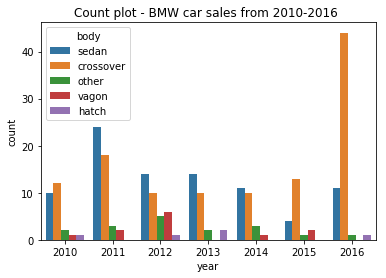

In [58]:
car_data2=car_data[(car_data.year>=2010)&(car_data.car=="BMW")]
sns.countplot("year",data=car_data2,hue="body");
plt.title('Count plot - BMW car sales from 2010-2016 ')
plt.show()

From the above grap , understand crossover bodytype BMW car was highly soldout in 2016

So futher i wanted to know  

1.What engineType was soldout highly  

2.What model was soldout highly

C:\Users\Sopna\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Factorplot-Count max soldout BMW car engType and Model in Year 2016')

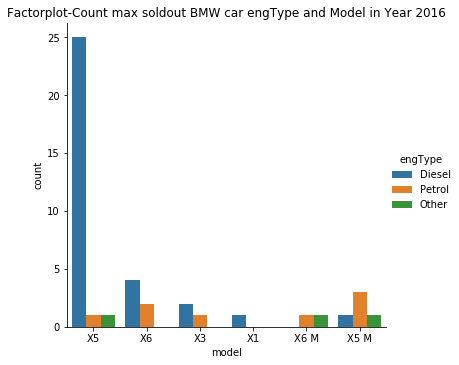

In [59]:
sns.factorplot('model', data=car_data2[(car_data2.year==2016)&(car_data2.body=="crossover")], hue='engType', kind='count')
plt.title('Factorplot-Count max soldout BMW car engType and Model in Year 2016')

From the above grap,understand bodytype crossover,engType Diesel and model X5 BMW car was highly soldout in 2016.

Using the crosstab fuction to compare the this result 

In [60]:
pd.crosstab([car_data2.body, car_data2.model], car_data2.engType, margins=True).apply(lambda r: 100*r/len(car_data2), axis=1).style.background_gradient(cmap='autumn_r')

By looking above grap, understand max 17.15% of  bodytype crossover,engType Diesel and model X5 BMW car was highly soldout in 2016.

Conclusion:

    1. The BMW X5 Crossover Diesel engine car is highly soldout
    
    2. The highest mileage BMW car model detail -
    
car                BMW
price           139000
body             vagon
mileage            850
engV                 5
engType         Petrol
registration       yes
year              2016
model               Z4